<a href="https://colab.research.google.com/github/Tatis88/ProjetoAplicadoI/blob/main/Notebook/EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importação dos Dados

Nessa seção será realizado a importação das bibliotecas em python necessárias para realização da análise exploratória da base de usuários da Netflix (kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset), além de realizar o upload da base de dados exportada no formato de .csv

## 1.1 Bibliotecas

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Database

In [106]:
# Carregar o dataset
file_path = 'Netflix Userbase.csv'
df = pd.read_csv(file_path)

# 2. Sanitização e Pré-EDA

Nessa seção será realizado a verificação da base de dados a ser explorada, tendo o foco de verificar: a presença de nulos e a presença de outliers; visando tornar os insights a serem extraídos coerentes e representativos da amostra de dados analisada.

Além disso, faremos uma exploração inicial do dataset, a fim de observar: a estrutura dos dados da amostra e o comportamento estatístico macro das variáveis a serem analisadas.

## 2.1 Presença de Nulos e Outliers

In [107]:
# Verificar a presença de valores nulos
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


Não há nenhum elemento nulo na base de dados!

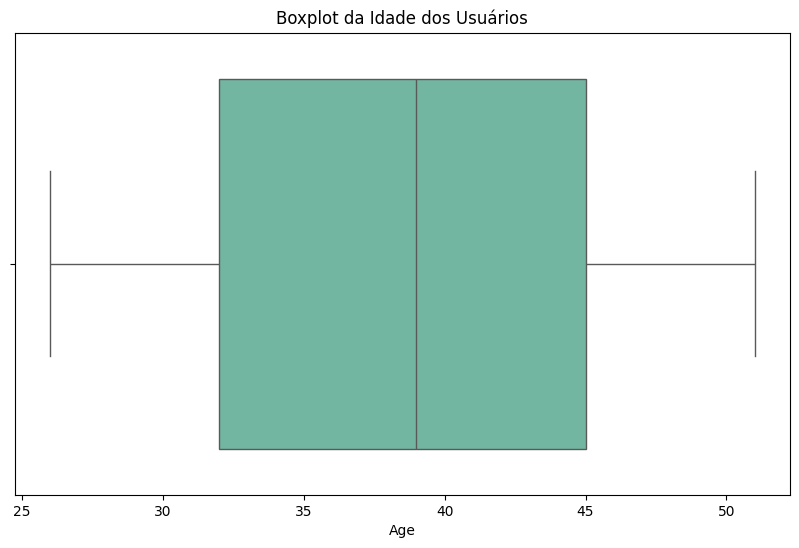

In [108]:
# Boxplot para verificar outliers na idade
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age')
plt.title('Boxplot da Idade dos Usuários')
plt.show()

- A base de dados não aparenta ter uma quantidade representativa de outliers fora dos extremos de 25 a 50 anos.
- Apresentando uma maior concentração dos dados entre 32 a 45 anos e com uma mediana em 38 anos.

## 2.2 Exploração inicial do Dataset

In [109]:
# Verificar as primeiras linhas do dataset
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [110]:
# Verificar a estrutura do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [111]:
# Estatísticas descritivas básicas
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000



Estatísticas Adicionais da Receita Mensal:
Variância Amostral:
2.84546762705082

Variância Populacional:
2.8443294399999997

Desvio Padrão Amostral:
1.6868513944775396

Desvio Padrão Populacional:
1.6865139904548672

Quartis:
0.25    11.0
0.50    12.0
0.75    14.0
Name: Monthly Revenue, dtype: float64


Estatísticas Adicionais da Idade dos Usuários:
Variância Amostral:
51.4343943977591

Variância Populacional:
51.41382064

Desvio Padrão Amostral:
7.171777631644689

Desvio Padrão Populacional:
7.1703431326541125

Quartis:
0.25    32.0
0.50    39.0
0.75    45.0
Name: Age, dtype: float64



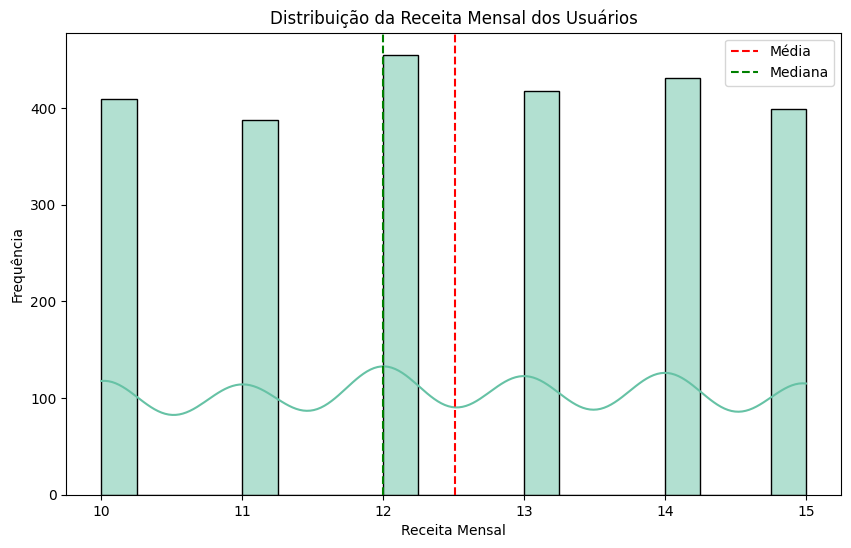

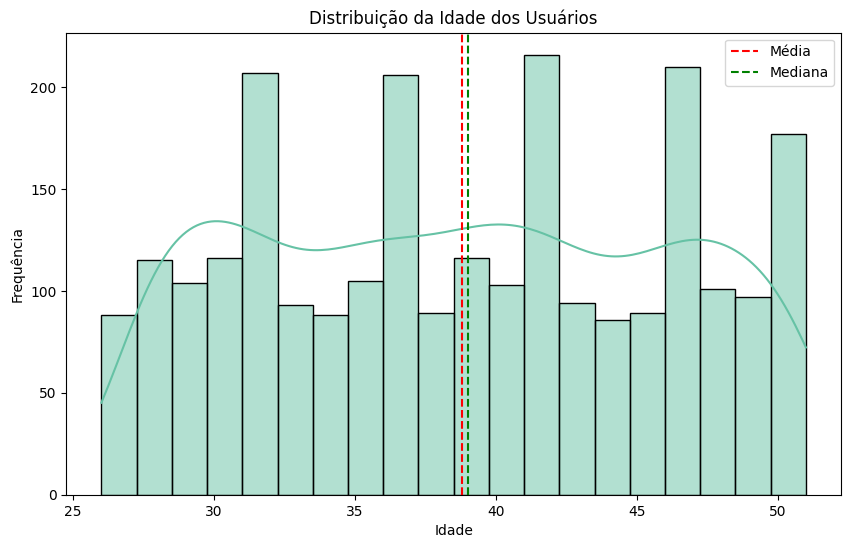

In [112]:
# Definir uma função para calcular estatísticas adicionais
def calculate_additional_statistics(column):
    # Variância
    variance_sample = column.var(ddof=1)  # Variância amostral
    variance_population = column.var(ddof=0)  # Variância populacional
    std_dev_sample = column.std(ddof=1)  # Desvio padrão amostral
    std_dev_population = column.std(ddof=0)  # Desvio padrão populacional
    quartiles = column.quantile([0.25, 0.5, 0.75])

    return {
        'Variância Amostral': variance_sample,
        'Variância Populacional': variance_population,
        'Desvio Padrão Amostral': std_dev_sample,
        'Desvio Padrão Populacional': std_dev_population,
        'Quartis': quartiles
    }

# Calcular estatísticas adicionais para as colunas numéricas
monthly_revenue_stats = calculate_additional_statistics(df['Monthly Revenue'])
age_stats = calculate_additional_statistics(df['Age'])

# Mostrar resultados
print("\nEstatísticas Adicionais da Receita Mensal:")
for key, value in monthly_revenue_stats.items():
    print(f"{key}:\n{value}\n")

print("\nEstatísticas Adicionais da Idade dos Usuários:")
for key, value in age_stats.items():
    print(f"{key}:\n{value}\n")

# Visualizar a distribuição da Receita Mensal
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribuição da Receita Mensal dos Usuários')
plt.xlabel('Receita Mensal')
plt.ylabel('Frequência')
plt.axvline(descriptive_stats.loc['mean', 'Monthly Revenue'], color='r', linestyle='--', label='Média')
plt.axvline(descriptive_stats.loc['50%', 'Monthly Revenue'], color='g', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Visualizar a distribuição da Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.axvline(descriptive_stats.loc['mean', 'Age'], color='r', linestyle='--', label='Média')
plt.axvline(descriptive_stats.loc['50%', 'Age'], color='g', linestyle='--', label='Mediana')
plt.legend()
plt.show()




# 3. Análise Exploratória

Nessa seção será verificada a distribuição dos usuários da Netflix conforme as seguintes segmentações: país, faixa etária e tipo de assinatura.

### 3.1 Distribuição de usuários por país

**Principais Insights**

- 1) EUA e Espanha se destacam como os países que apresentam o maior volume de usuários assinantes.
- 2) Aparentemente, há uma diferenciação entre os top 3 países em relação aos demais do top 10, de modo que se situam em patamares diferentes de volume de usuários assinantes.

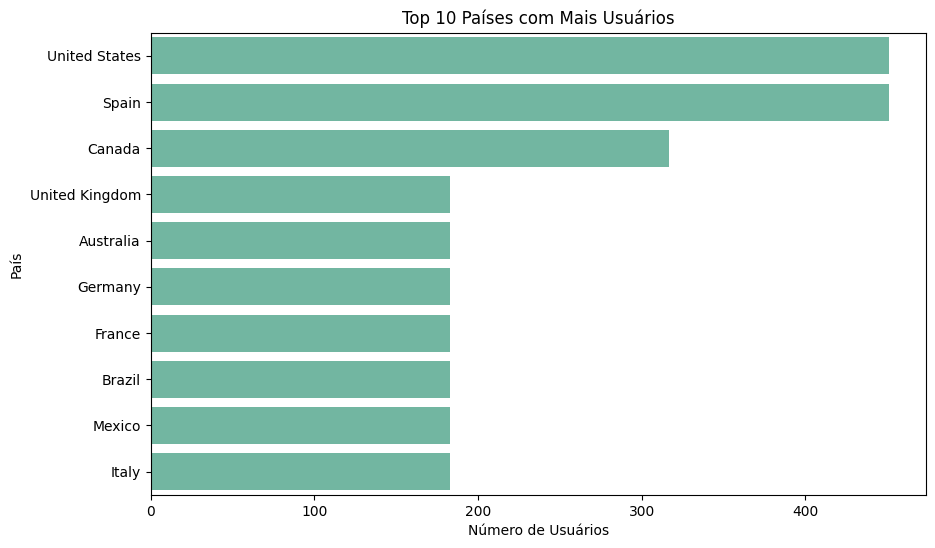

In [113]:
# Contar a quantidade de usuários por país
user_country_counts = df['Country'].value_counts().head(10)  # Exibir os 10 principais países

# Visualizar os países com mais usuários
plt.figure(figsize=(10, 6))
sns.barplot(x=user_country_counts.values, y=user_country_counts.index)
plt.title('Top 10 Países com Mais Usuários')
plt.xlabel('Número de Usuários')
plt.ylabel('País')
plt.show()

### 3.2 Distribuição dos usuários por faixa etária

**Principais Insights**

- 1) Observa-se que 50 anos é a idade mais frequente dos usuários assinantes
- 2) Para as demais faixas etárias se observa um comportamento quase uniforme

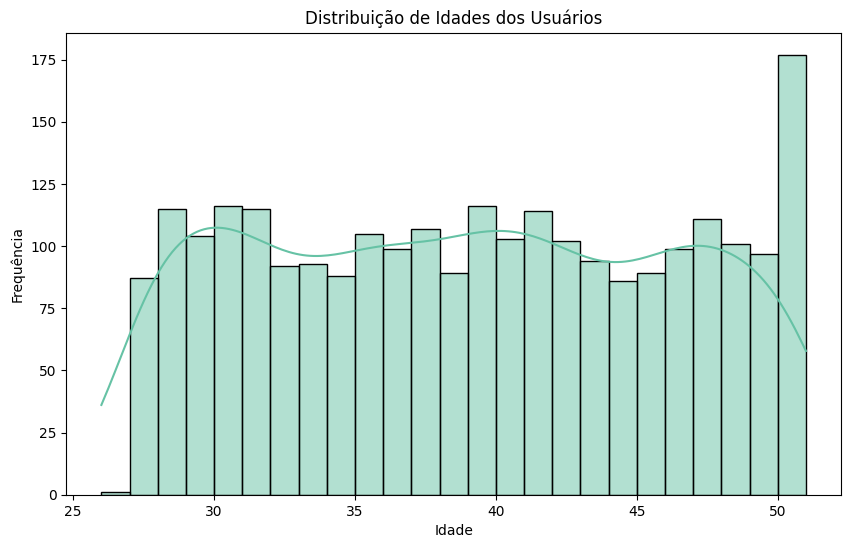

In [114]:
# Visualizar a distribuição de faixas etárias
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], binwidth=1, kde=True)  # Removido o argumento palette
plt.title('Distribuição de Idades dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### 3.3 Distribuição de Usuários por Plano de Assinatura

**Principais Insights**

- 1) Plano Básico é o mais assinado entre os usuários
- 2) O plano premium e o plano standard apresentam uma quantidade de usuários semelhante (de modo que podemos dizer que temos dois tipos distintos de clientes e que são igualmente representativos a base de usuários)

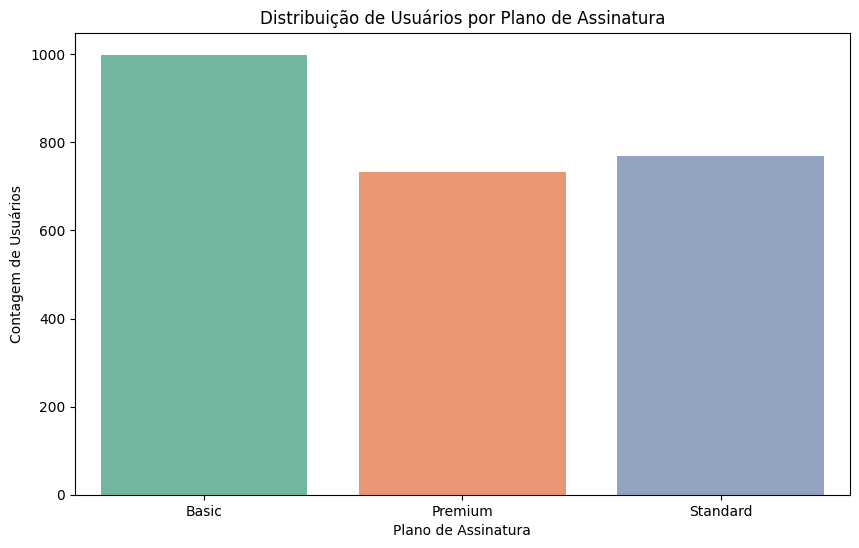

In [115]:
# Verificar o número de usuários por tipo de assinatura (Plano)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Subscription Type', hue='Subscription Type', palette="Set2", legend=False)
plt.title('Distribuição de Usuários por Plano de Assinatura')
plt.xlabel('Plano de Assinatura')
plt.ylabel('Contagem de Usuários')
plt.show()

### 3.4 Distribuição dos usuários por país e pela idade mais comum (moda da idade)

**Principais Insights**

- 1) Observa-se 2 perfis de usuários: jovens-adultos (entre 28 a 32 anos) e adultos (40 a 50 anos).
- 2) O perfil de jovens-adultos está concentrado no Brasil, Itália, Espanha e EUA.
- 3) O perfil de adultos está concentrado em países europeus e com destaque para o México que apresenta o público de assinantes mais velhos dentro desse perfil.

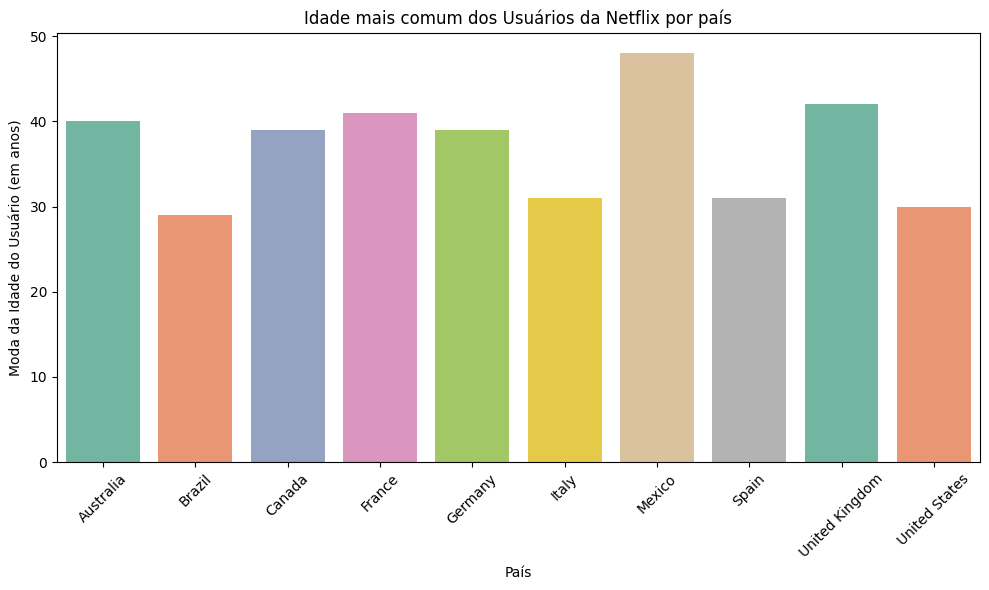

In [116]:
# Calcular a moda da idade dos usuários por país
moda_idade = df.groupby('Country')['Age'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Plotar o gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=moda_idade, x='Country', y='Age', hue='Country', palette="Set2", dodge=False)
plt.title('Idade mais comum dos Usuários da Netflix por país')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Moda da Idade do Usuário (em anos)')
plt.tight_layout()
plt.show()

### 3.5 Distribuição dos usuários por país e gênero

**Principais Insights**

- 1) Espanha e Brasil são os principais países que apresentam uma maior concentração de assinantes do gênero feminino do que masculino. Além de serem os países de maior preponderência de assinantes jovens-adultos.
- 2) México e Austrália são os principais países que apresentam uma maior concentração de assinantes do gênero masculino do que feminino. Além de serem os países de maior preponderência de assinantes adultos.

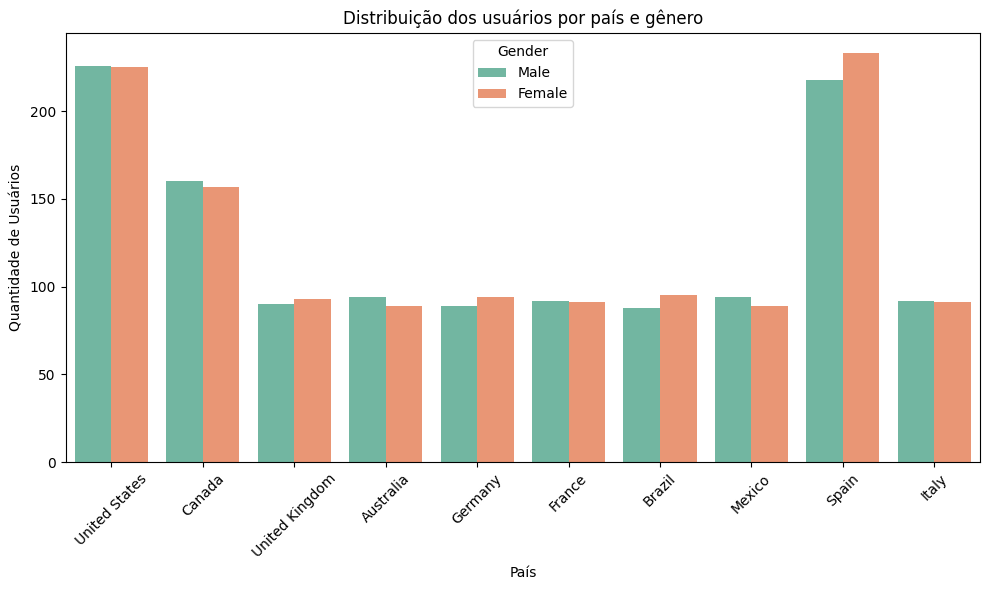

In [117]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', hue='Gender', palette="Set2")

# Customizar o gráfico
plt.title('Distribuição dos usuários por país e gênero')
plt.ylabel('Quantidade de Usuários')
plt.xlabel('País')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### 3.6 Distribuição do tipo de assinatura por país

**Principais Insights**

- 1) Espanha e França: quantidade significativa de assinantes Premium.
- 2) Brasil: uma quantidade maior de usuários do plano Basic
- 3) Alemanha e Itália: alto número de assinantes Basic
- 4) Reino Unido e México: alta adesão da assinatura Standard
- 5) Estados Unidos e Canadá: distribuição equilibrada entre os planos

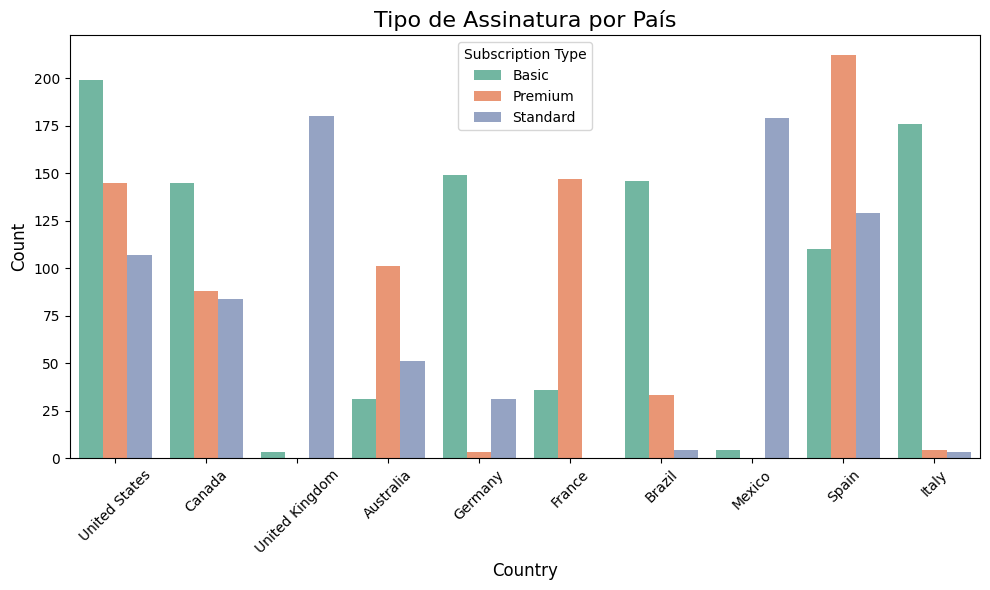

In [118]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de contagem por país e tipo de assinatura
sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set2')

# Configurar título
plt.title("Tipo de Assinatura por País", fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.tight_layout()
plt.show()

### 3.7 Distribuição dos usuários por gênero e tipo de assinatura

**Principais Insights**

- 1) Não se observa uma distinção significativa de gênero entre os tipos de assinatura

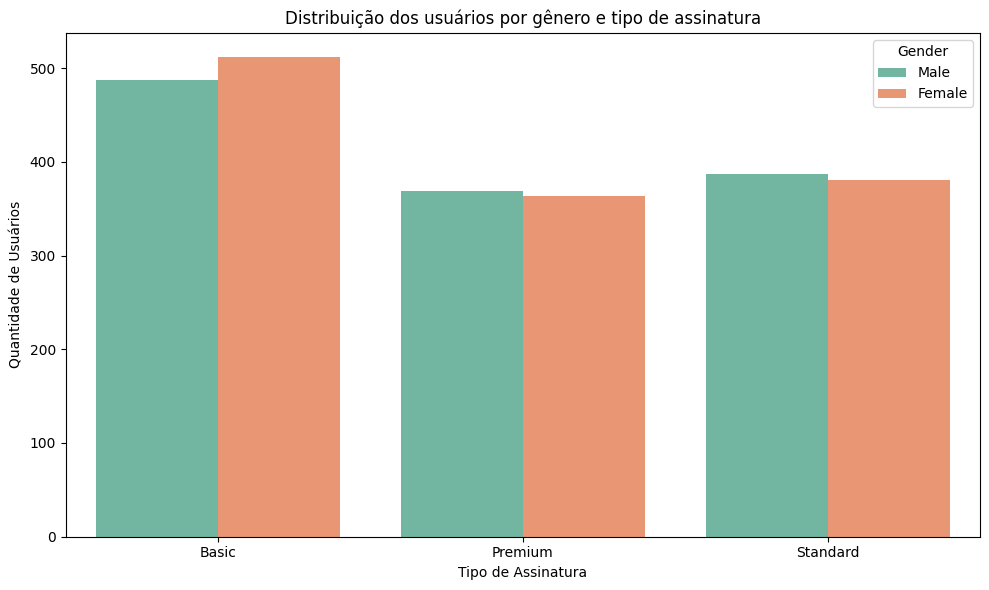

In [119]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription Type', hue='Gender', palette="Set2")

# Customizar o gráfico
plt.title('Distribuição dos usuários por gênero e tipo de assinatura')
plt.ylabel('Quantidade de Usuários')
plt.xlabel('Tipo de Assinatura')

# Exibir o gráfico
plt.tight_layout()
plt.show()

### 3.8 Distribuição do Life Time Value (LTV) por País

**Principais Insights**

- Itália e o Reino Unido têm os maiores valores de LTV, o que pode indicar uma maior disposição dos usuários nesses países a gastar com o serviço. Já o México apresenta o menor valor.




In [121]:
# Calcular o LTV (média da receita mensal) por país
ltv_per_country = df.groupby('Country')['Monthly Revenue'].mean().reset_index()

# Renomear as colunas para melhor clareza
ltv_per_country.columns = ['Country', 'Life Time Value (LTV)']

# Exibir a tabela com os dados do LTV por país
print(ltv_per_country)

          Country  Life Time Value (LTV)
0       Australia              12.409836
1          Brazil              12.486339
2          Canada              12.460568
3          France              12.606557
4         Germany              12.349727
5           Italy              12.661202
6          Mexico              12.224044
7           Spain              12.554324
8  United Kingdom              12.666667
9   United States              12.558758


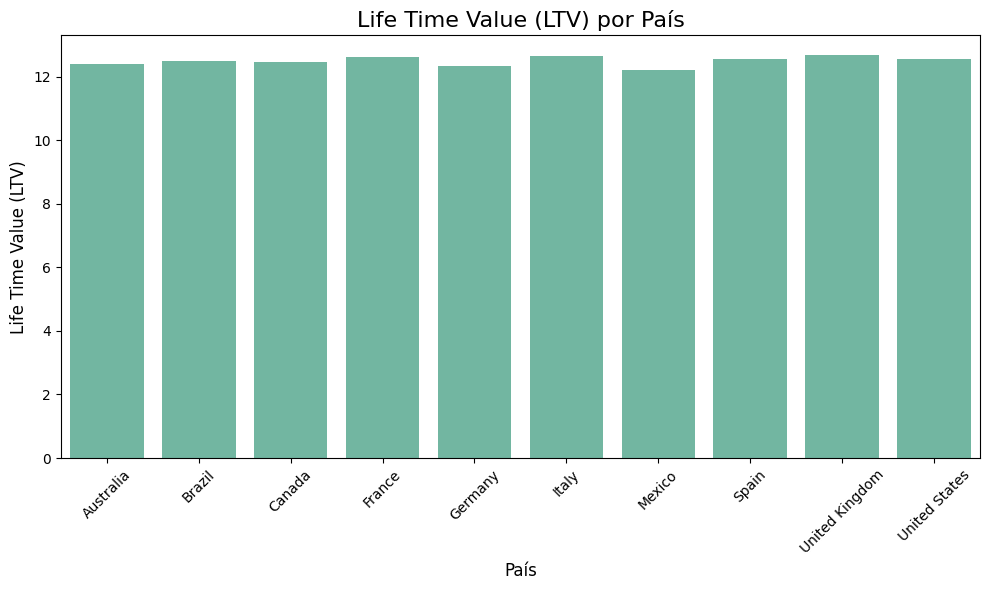

In [120]:
# Calcular o LTV (média da receita mensal)
ltv_per_country = df.groupby('Country')['Monthly Revenue'].mean()

# Definir a paleta de cores como Set2
sns.set_palette("Set2")

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
sns.barplot(x=ltv_per_country.index, y=ltv_per_country.values)

# Configurar títulos e rótulos dos eixos
plt.title('Life Time Value (LTV) por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Life Time Value (LTV)', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.tight_layout()
plt.show()


# 4. Conclusão

**Key Insights**

- A princípio a análise revelou que os principais mercados da Netflix são compostos por uma base adulta, com preferência por planos mais acessíveis, como o Básico. Há uma uniformidade na distribuição de gênero e tipo de assinatura, o que sugere que as preferências dos usuários são bastante consistentes.

**Próximos Passos:**

- Storytelling dos Dados: Com base nesses insights, o próximo passo é desenvolver um data storytelling para ajudar a guiar as estratégias de marketing para atrais mais assinantes e expandir a atuação em novos mercados.

**Dificuldades encontradas**:

- A ausência de informações adicionais sobre o comportamento dos usuários (como tempo de visualização ou preferências de conteúdo) limitou a profundidade da análise.
- A análise não levou em conta aspectos culturais que podem influenciar o uso da plataforma em diferentes países.